In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [82]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [84]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [85]:
df.duplicated().sum()

0

In [86]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

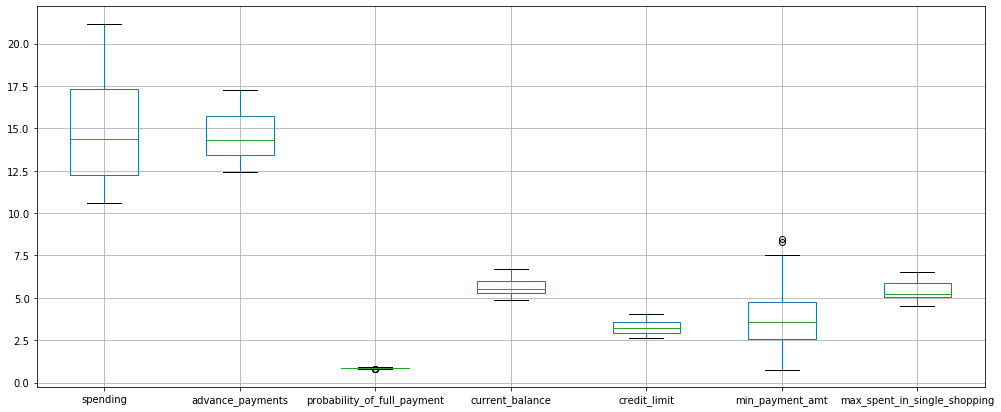

In [87]:
plt.figure(figsize=(17,7))
df.boxplot()

In [88]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [89]:
for feature in df[['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

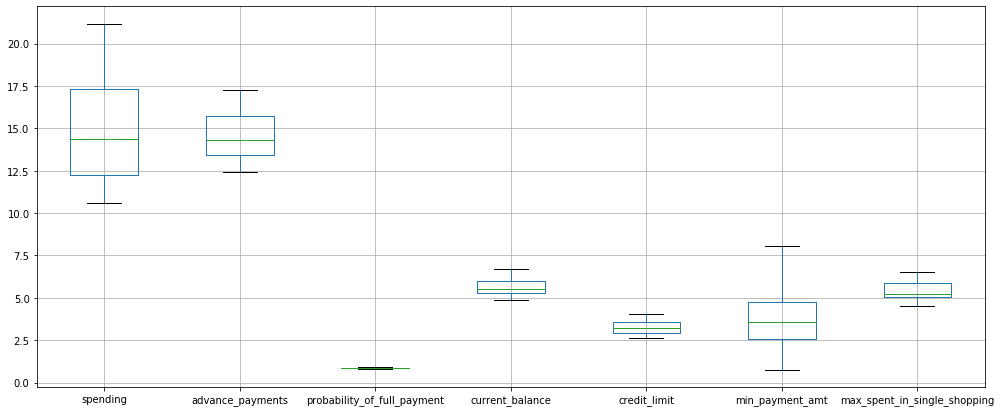

In [90]:
plt.figure(figsize=(17,7))
df.boxplot()

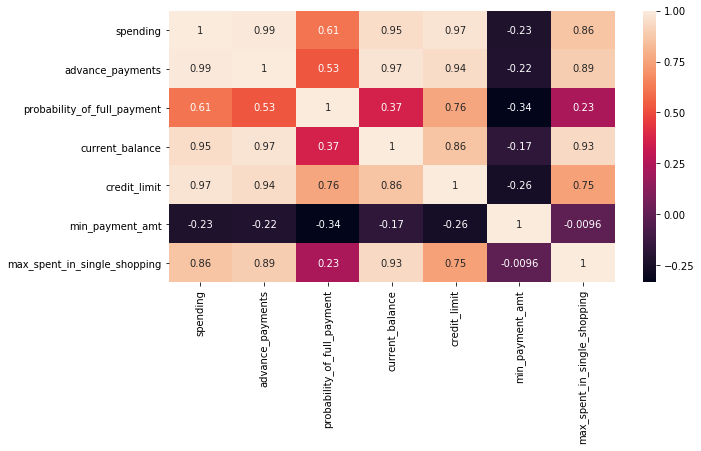

In [91]:
x=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(x,annot=True)

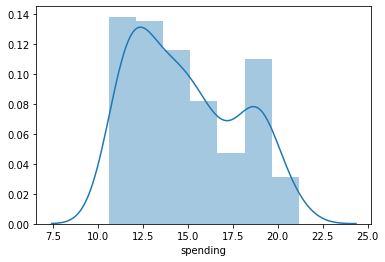

In [92]:
sns.distplot(df['spending'])

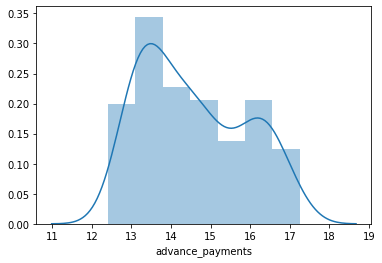

In [93]:
sns.distplot(df['advance_payments'])

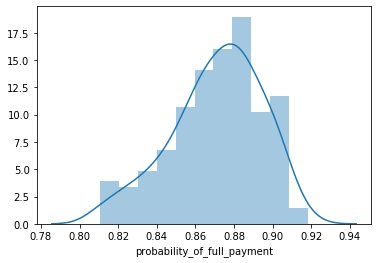

In [94]:
sns.distplot(df['probability_of_full_payment'])

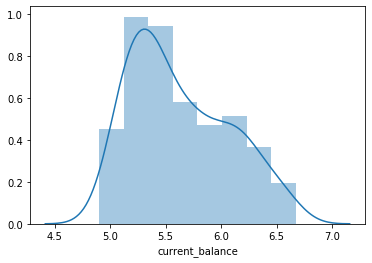

In [95]:
sns.distplot(df['current_balance'])

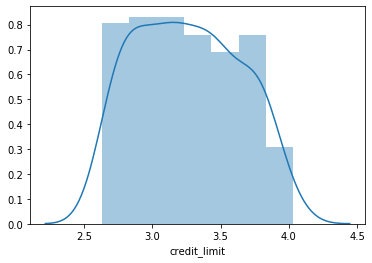

In [96]:
sns.distplot(df['credit_limit'])

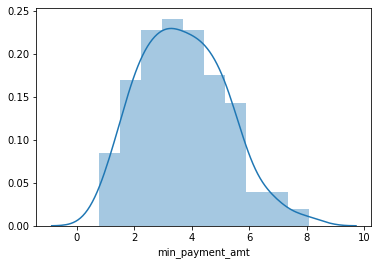

In [97]:
sns.distplot(df['min_payment_amt'])

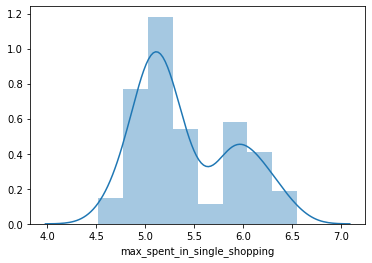

In [98]:
sns.distplot(df['max_spent_in_single_shopping'])

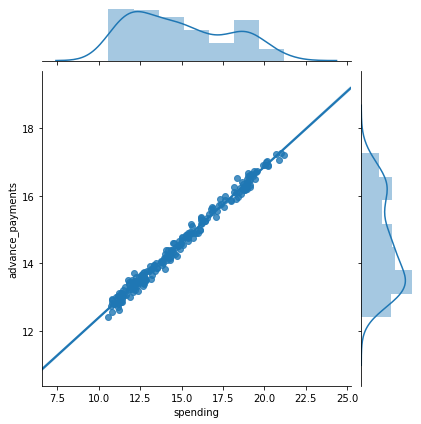

In [99]:
sns.jointplot(df['spending'],df['advance_payments'],kind='reg')

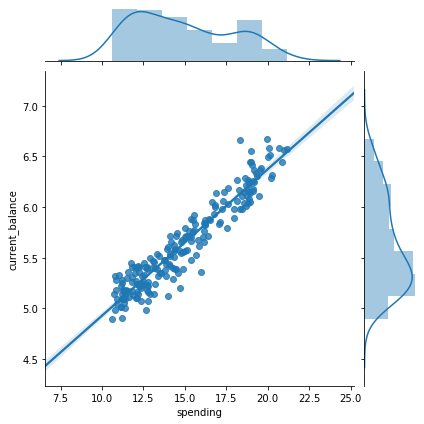

In [100]:
sns.jointplot(df['spending'],df['current_balance'],kind='reg')

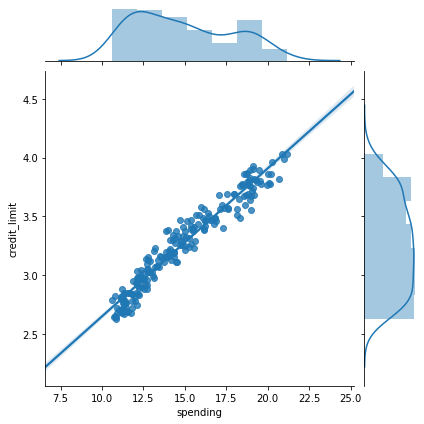

In [101]:
sns.jointplot(df['spending'],df['credit_limit'],kind='reg')

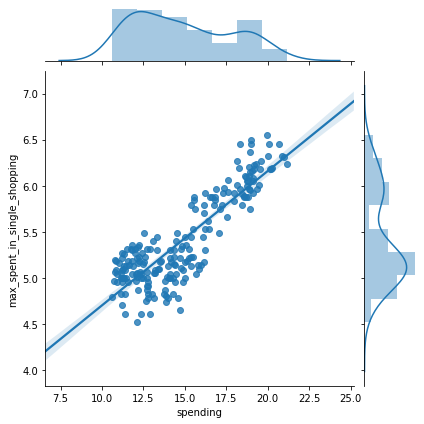

In [102]:
sns.jointplot(df['spending'],df['max_spent_in_single_shopping'],kind='reg')

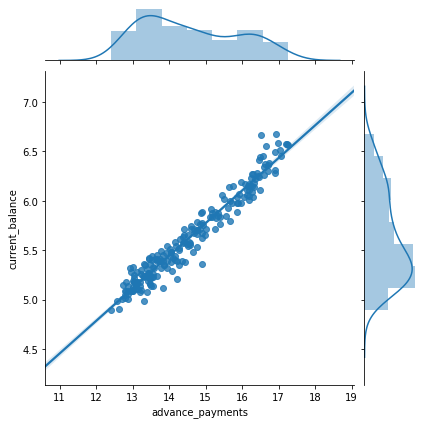

In [103]:
sns.jointplot(df['advance_payments'],df['current_balance'],kind='reg')

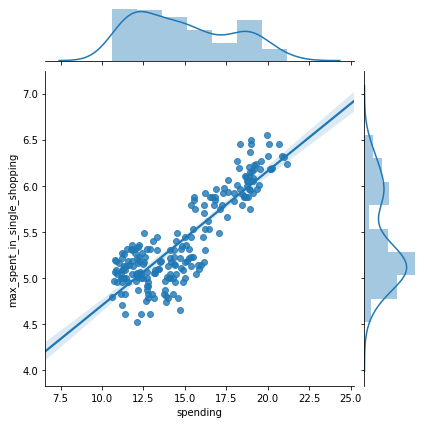

In [104]:
sns.jointplot(df['spending'],df['max_spent_in_single_shopping'],kind='reg')

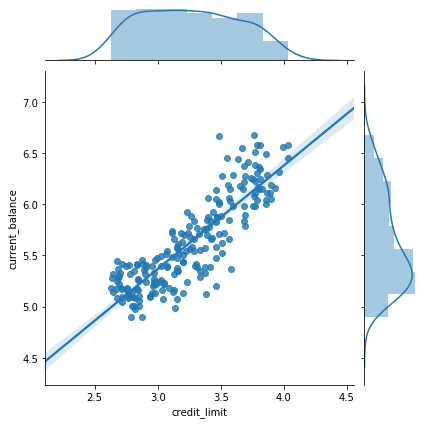

In [105]:
sns.jointplot(df['credit_limit'],df['current_balance'],kind='reg')

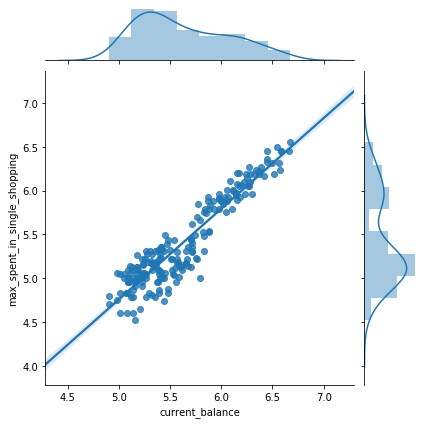

In [106]:
sns.jointplot(df['current_balance'],df['max_spent_in_single_shopping'],kind='reg')

In [107]:
df1=df.iloc[:]

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
sc = StandardScaler()

In [110]:
df1 = sc.fit_transform(df1)

In [111]:
df1

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [112]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 2)

In [113]:
k_means.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [114]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [115]:
k_means.inertia_

659.1474009548498

In [117]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df1)
    wss.append(KM.inertia_)

In [118]:
wss

[1470.0,
 659.1474009548498,
 430.2984817512229,
 371.0356644664014,
 325.91481424455253,
 288.87262693751563,
 261.70343166701974,
 239.99755307866684,
 220.8312817253219,
 206.0704206856896]

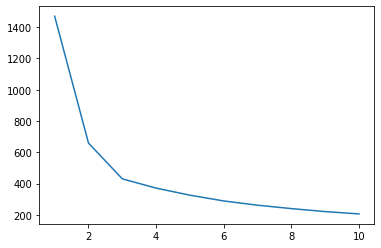

In [119]:
plt.plot(range(1,11), wss)

In [120]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df1)
labels = k_means.labels_

In [121]:
df["Clusters"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [122]:
df.Clusters.value_counts().sort_index()

0    133
1     77
Name: Clusters, dtype: int64

In [123]:
aggdata=df.groupby('Clusters').mean()
aggdata['Freq']=df.Clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clusters,,,,,,,,
0,12.930602,13.693459,0.863619,5.339699,3.025917,3.822845,5.081737,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,77


In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df,labels)

0.530650791509288

In [56]:
sil_width = silhouette_samples(df,labels)

In [57]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0.670626
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0,-0.116042
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0.715653
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0,0.636275
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0.619182


In [58]:
silhouette_samples(df,labels).min()

-0.11093475637165014

In [59]:
df[df['sil_width']<0].count()

spending                        2
advance_payments                2
probability_of_full_payment     2
current_balance                 2
credit_limit                    2
min_payment_amt                 2
max_spent_in_single_shopping    2
Clus_kmeans                     2
sil_width                       2
dtype: int64

In [60]:
df3=pd.read_csv('bank_marketing_part1_Data.csv')

In [61]:
df4=df3.iloc[:]

In [62]:
sc = StandardScaler()

In [63]:
df4 = sc.fit_transform(df4)

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [65]:
wardlink = linkage(df4, method = 'ward')

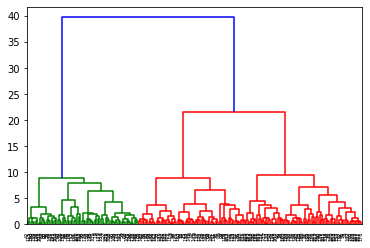

In [66]:
dend = dendrogram(wardlink)

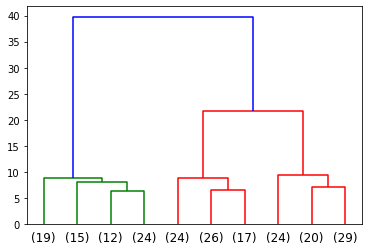

In [67]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [69]:
from scipy.cluster.hierarchy import fcluster

In [70]:
clusters = fcluster(wardlink,2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [71]:
df3["Clusters"] = clusters
df3.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [72]:
df3.Clusters.value_counts().sort_index()

1     70
2    140
Name: Clusters, dtype: int64

In [73]:
aggdata=df3.groupby('Clusters').mean()
aggdata['Freq']=df3.Clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.085571,13.766214,0.864298,5.363714,3.045593,3.730723,5.103421,140


In [145]:
df5=pd.read_csv('insurance_part2_data.csv')

In [146]:
df5.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


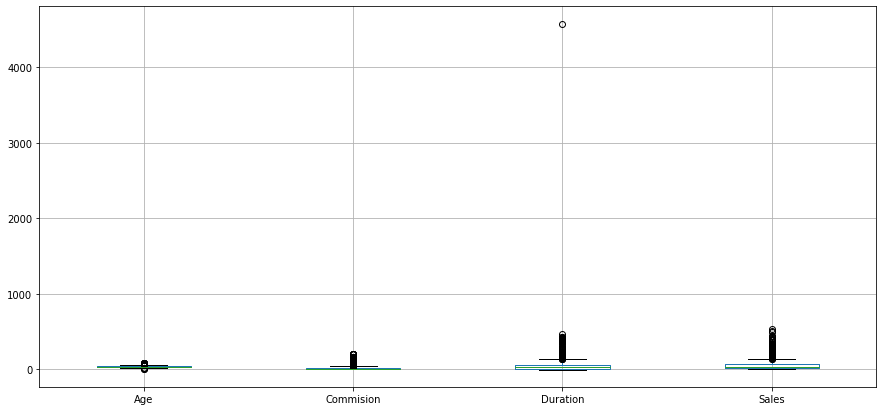

In [147]:
plt.figure(figsize=(15,7))
df5.boxplot()

In [148]:
df5.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


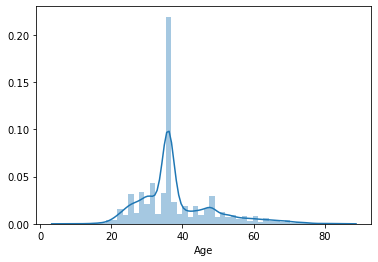

In [149]:
sns.distplot(df5['Age'])

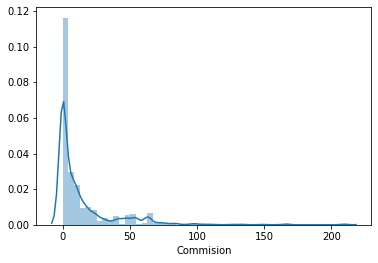

In [150]:
sns.distplot(df5['Commision'])

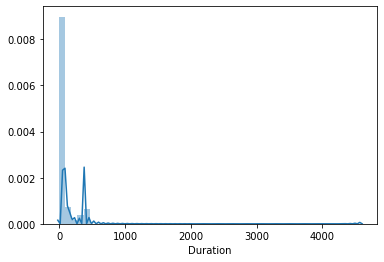

In [151]:
sns.distplot(df5['Duration'])

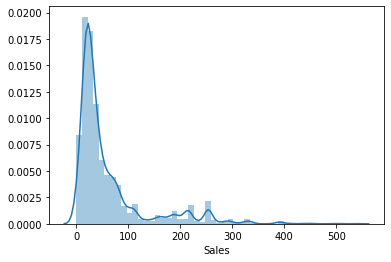

In [152]:
sns.distplot(df5['Sales'])

In [160]:
df6 = df5.iloc[:,2:]

In [161]:
df6.head()

,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [162]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 187.6+ KB


In [163]:
df6.isnull().sum()

Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [164]:
for feature in df6.columns: 
    if df6[feature].dtype == 'object': 
        df6[feature] = pd.Categorical(df6[feature]).codes

In [165]:
from scipy.stats import zscore
for i in df6[['Commision','Sales','Duration']]:
    df6[[i]] = df6[[i]].apply(zscore)
    df6[[i]]=np.where(df6[[i]]>3,3,df6[[i]])
    df6[[i]]=np.where(df6[[i]]<-3,-3,df6[[i]])

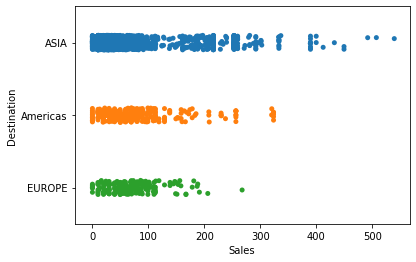

In [170]:
sns.stripplot(df5['Sales'],df5['Destination'])

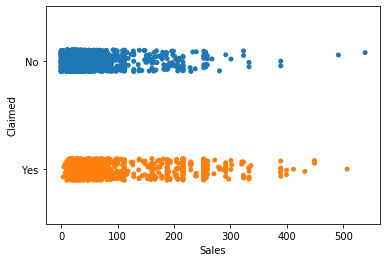

In [167]:
sns.stripplot(df5['Sales'],df5['Claimed'])

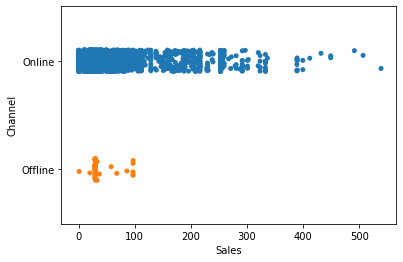

In [172]:
sns.stripplot(df5['Sales'],df5['Channel'])

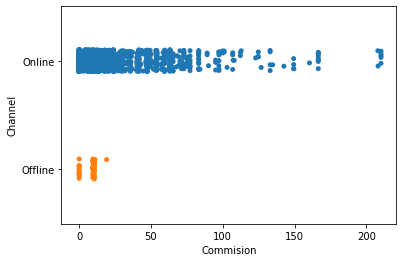

In [174]:
sns.stripplot(df5['Commision'],df5['Channel'])

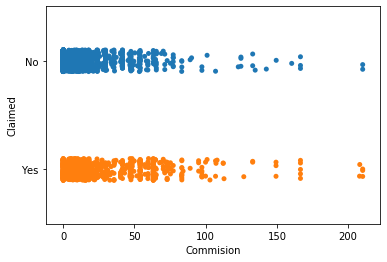

In [175]:
sns.stripplot(df5['Commision'],df5['Claimed'])

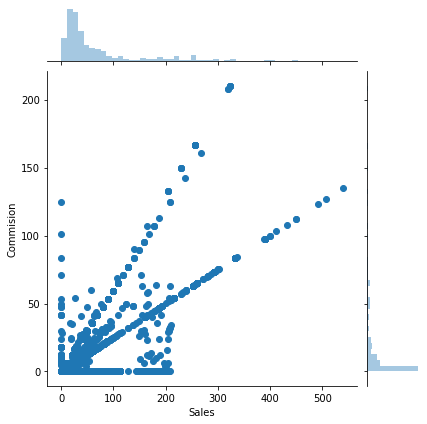

In [177]:
sns.jointplot(df5['Sales'],df5['Commision'])

In [163]:
df6.head()

,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,0,0,-0.542807,1,-0.470051,-0.816433,2,0
1,1,0,-0.570282,1,-0.268605,-0.569127,2,0
2,1,0,-0.337133,1,-0.499894,-0.711940,2,1
3,1,0,-0.570282,1,-0.492433,-0.484288,1,0
4,0,0,-0.323003,1,-0.126846,-0.597407,0,0


In [166]:
x = df6.drop("Claimed",axis=1)
y = df6.pop("Claimed")

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [188]:
X_train.shape

(2100, 7)

In [168]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [169]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [170]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('C:\\Users\\edhrsur\\Desktop\\GL\\Week 18,19 - Project\\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [171]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Type          0.001260
Commision     0.185024
Channel       0.011485
Duration      0.360768
Sales         0.218912
Product Name  0.196854
Destination   0.025698


In [172]:
y_predict = dt_model.predict(X_test)

In [173]:
y_predict.shape

(900,)

In [176]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8,9,10],
    'min_samples_leaf': [8,10,11,13,14],
    'min_samples_split': [13,17,20]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 5)

In [177]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [8, 10, 11, 13, 14],
                 

In [178]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 13}

In [179]:
best_grid = grid_search.best_estimator_

In [180]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [181]:
from sklearn.metrics import classification_report

In [182]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1471
           1       0.75      0.53      0.62       629

    accuracy                           0.81      2100
   macro avg       0.79      0.73      0.74      2100
weighted avg       0.80      0.81      0.79      2100



In [183]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.83       605
           1       0.71      0.42      0.53       295

    accuracy                           0.76       900
   macro avg       0.74      0.67      0.68       900
weighted avg       0.75      0.76      0.74       900



In [184]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=13)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [185]:
credit_tree_regularized = open('C:\\Users\\edhrsur\\Desktop\\GL\\Week 18,19 - Project\\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                   Imp
Type          0.003871
Commision     0.277088
Channel       0.000000
Duration      0.063073
Sales         0.173671
Product Name  0.475031
Destination   0.007266


AUC: 0.862


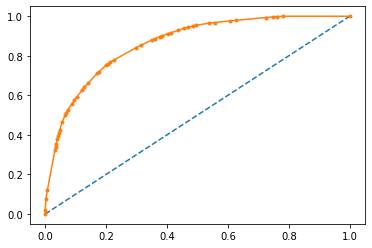

In [186]:
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.797


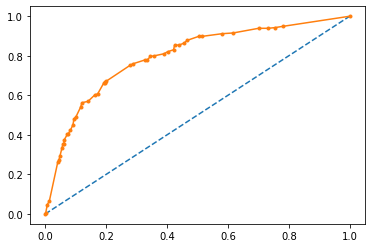

In [187]:
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

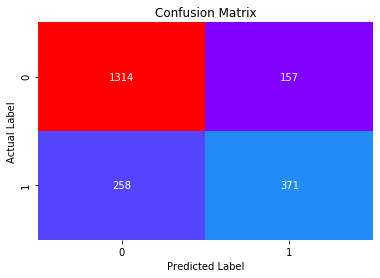

In [131]:
# Get the confusion matrix on the train data
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

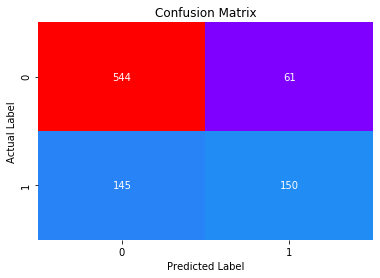

In [132]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [88]:
df5=pd.read_csv('insurance_part2_data.csv')

In [89]:
df5.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [90]:
df5 = df5.iloc[:,2:]

In [91]:
df5.head()

,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [92]:
for feature in df5.columns: 
    if df5[feature].dtype == 'object': 
        df5[feature] = pd.Categorical(df5[feature]).codes

In [93]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(2), int64(1), int8(5)
memory usage: 85.0 KB


In [94]:
from scipy.stats import zscore

In [95]:
for i in df5[['Commision','Sales','Duration']]:
    df5[[i]] = df5[[i]].apply(zscore)
    df5[[i]]=np.where(df5[[i]]>3,3,df5[[i]])
    df5[[i]]=np.where(df5[[i]]<-3,-3,df5[[i]])

In [96]:
df5.head()

,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,0,0,-0.542807,1,-0.470051,-0.816433,2,0
1,1,0,-0.570282,1,-0.268605,-0.569127,2,0
2,1,0,-0.337133,1,-0.499894,-0.711940,2,1
3,1,0,-0.570282,1,-0.492433,-0.484288,1,0
4,0,0,-0.323003,1,-0.126846,-0.597407,0,0


In [97]:
x = df5.drop("Claimed",axis=1)
y = df5.pop("Claimed")

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train, train_labels)

In [100]:
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix,classification_report

In [103]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1471
           1       0.95      0.95      0.95       629

    accuracy                           0.97      2100
   macro avg       0.96      0.96      0.96      2100
weighted avg       0.97      0.97      0.97      2100



In [104]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       605
           1       0.61      0.48      0.54       295

    accuracy                           0.73       900
   macro avg       0.69      0.67      0.67       900
weighted avg       0.72      0.73      0.72       900



In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [5,6,7],
    'min_samples_leaf': [13,15,17],
    'min_samples_split': [20,30,40],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [106]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [108]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 20,
 'n_estimators': 301}

In [109]:
best_grid = grid_search.best_estimator_

In [110]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [111]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.60      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.81      0.81      0.81      2100



In [112]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       605
           1       0.71      0.50      0.59       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



AUC: 0.875


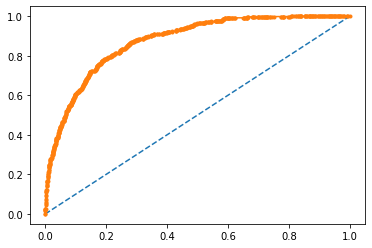

In [113]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.817


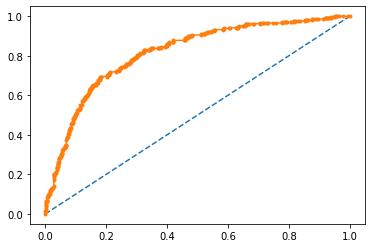

In [114]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

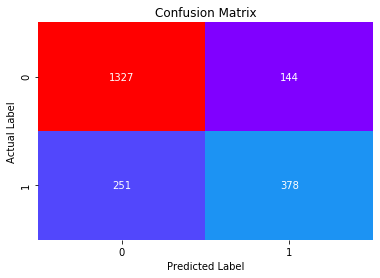

In [115]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

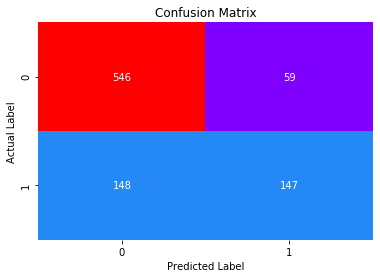

In [116]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [117]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Type          0.016116
Commision     0.179400
Channel       0.000110
Duration      0.112876
Sales         0.205144
Product Name  0.474707
Destination   0.011647


In [120]:
df6=pd.read_csv('insurance_part2_data.csv')

In [121]:
df6 = df6.iloc[:,2:]

In [122]:
df6.head()

,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [123]:
for feature in df6.columns: 
    if df6[feature].dtype == 'object': 
        df6[feature] = pd.Categorical(df6[feature]).codes

In [124]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(2), int64(1), int8(5)
memory usage: 85.0 KB


In [125]:
x = df6.drop("Claimed",axis=1)
y = df6.pop("Claimed")

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=21)

In [127]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [128]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.0001)

In [129]:
clf.fit(X_train, train_labels)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 1.04699356
Iteration 5, loss = 1.07758050
Iteration 6, loss = 0.99826489
Iteration 7, loss = 0.88993018
Iteration 8, loss = 0.77958363
Iteration 9, loss = 0.77947769
Iteration 10, loss = 0.74045522
Iteration 11, loss = 0.64398655
Iteration 12, loss = 0.72900595
Iteration 13, loss = 0.81410197
Iteration 14, loss = 0.64538502
Iteration 15, loss = 0.62266799
Iteration 16, loss = 0.62098727
Iteration 17, loss = 0.56825307
Iteration 18, loss = 0.58031036
Iteration 19, loss = 0.58929718
Iteration 20, loss = 0.58273975
Iteration 21, loss = 0.56827748
Iteration 22, loss = 0.55889542
Iteration 23, loss = 0.62093717
Iteration 24, loss = 0.54906911
Iteration 25, loss = 0.58699587
Iteration 26, loss = 0.57339316
Iteration 27, loss = 0.57886858
Iteration 28, loss = 0.55811030
Iteration 29, loss = 0.54342103
Iteration 30, loss = 0.58533801
Iteration 31, loss = 0.56124092
Iteration 32, loss = 0.55770650
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=21, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [130]:
y_predict = clf.predict(X_train)

In [131]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(train_labels, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1432
           1       0.74      0.41      0.53       668

    accuracy                           0.77      2100
   macro avg       0.76      0.67      0.69      2100
weighted avg       0.76      0.77      0.74      2100



In [132]:
ytest_predict = clf.predict(X_test)

In [133]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       644
           1       0.68      0.39      0.50       256

    accuracy                           0.77       900
   macro avg       0.74      0.66      0.68       900
weighted avg       0.76      0.77      0.75       900



In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300],
    'max_iter': [5000,6000,7000],
    'solver': ['sgd','adam'],
    'tol': [0.001,0.00001,0.000001],
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [135]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'hidden_layer_sizes': [100, 200, 300],
  

In [136]:
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 7000, 'solver': 'adam', 'tol': 1e-06}

In [137]:
best_grid = grid_search.best_estimator_

In [138]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [139]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1432
           1       0.72      0.43      0.54       668

    accuracy                           0.76      2100
   macro avg       0.75      0.68      0.69      2100
weighted avg       0.76      0.76      0.75      2100



In [140]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       644
           1       0.63      0.43      0.52       256

    accuracy                           0.77       900
   macro avg       0.72      0.67      0.68       900
weighted avg       0.75      0.77      0.75       900



AUC: 0.803


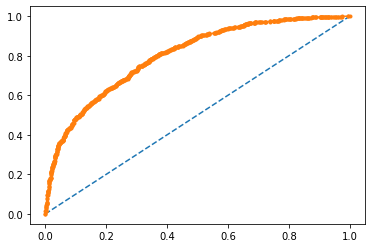

In [141]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.796


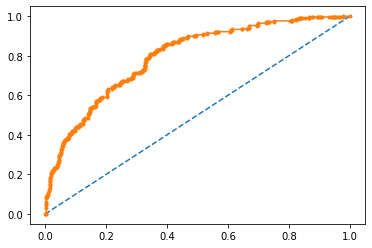

In [142]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

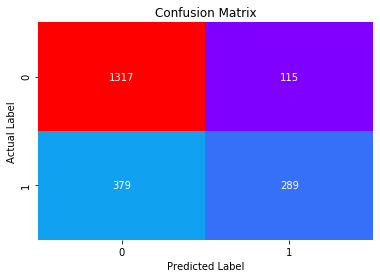

In [143]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

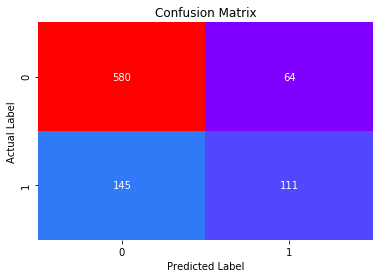

In [144]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()